
#  ----------------------------   Estructuración de Redes Sociales  ----------------------
 <img src="https://2.bp.blogspot.com/-uwVjNM32AGk/VuVpxEDjr3I/AAAAAAAAOSo/rQK2yPPLon8Olb2qfG0NgrXWLLdd7RLQA/s1600/Panzer_II_AusfC_AK.png" >

# Tarea 1

Developed by [Andrea Sissa](mailto:ap.sissa10@uniandes.edu.co) -- [Jesús Solano](mailto:ja.solano588@uniandes.edu.co) 

version 7.3, Septiembre 29 2018

# Punto 3 $\rightarrow$ Redes de Prostitución 

In [0]:
# Importar librerias necesarias para analizar redes.

import networkx as nx 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pickle 
import os 

In [2]:
# Descargar base de datos.

import os

path = ''
if not os.path.exists(path+'prostitucionBrazilPro.csv'):

  ! wget https://github.com/AndreaSissa/EstructuraRedesSociales/raw/master/Taller1/Punto3/Data/prostitucionBrazilPro.csv




Redirecting output to ‘wget-log’.


In [3]:
# Leer datos de las bases de datos

columns = ['FemaleID','MaleID','Date','Grade','Anal','Oral','Kiss']
from io import StringIO
prostitutionData = pd.read_csv(StringIO(''.join(l.replace(',,', '\t') for l in open(path+'prostitucionBrazilPro.csv'))), skiprows=lambda x : x in range(24),sep=';',header = None, names=columns)
prostitutionData['FemaleID'] = 'female'+ prostitutionData['FemaleID'].astype(str) 
prostitutionData['MaleID'] = 'male'+ prostitutionData['MaleID'].astype(str) 
prostitutionData.head(10)

,FemaleID,MaleID,Date,Grade,Anal,Oral,Kiss
0,female0,male1,0,0,0,0,0
1,female2,male1,0,1,-1,1,-1
2,female3,male1,0,0,0,0,0
3,female0,male4,21,0,0,0,0
4,female5,male6,47,0,0,0,0
5,female5,male6,73,0,0,0,0
6,female7,male8,105,0,0,0,0
7,female9,male10,121,0,0,0,0
8,female11,male12,124,1,0,0,0
9,female13,male12,126,1,0,0,0


In [0]:
# Consulta los nodos de la red bipartita(Hombres y mujeres)

maleNodes = prostitutionData['MaleID'].unique()
femaleNodes = prostitutionData['FemaleID'].unique()


In [0]:
# Se construye la red de prostitucion

prostitutionNetwork = nx.Graph()

# Agrega los nodos de hombres

for male in maleNodes:

    # Carga cada hombre y lo agrega a la red.
    prostitutionNetwork.add_node(male,bipartite=0)

# Agrega los nodos de mujeres.

for female in femaleNodes:
  
    # Carga cada mujer y la agrega a la red.
    prostitutionNetwork.add_node(female,bipartite=1)
# Se agregan los arcos a la red

for e in range(len(prostitutionData)):
  
    # Se definen los nodos de entrada.
    sourceNode = prostitutionData['MaleID'][e]
    # Se definen los nodos de salida.
    targetNode = prostitutionData['FemaleID'][e]

    prostitutionNetwork.add_edge(sourceNode, targetNode,date=prostitutionData['Date'][e],grade=prostitutionData['Grade'][e],anal=prostitutionData['Anal'][e],oral=prostitutionData['Oral'][e],kiss=prostitutionData['Kiss'][e]) 


**1.**	Realizar las proyecciones en Python de la red bipartita donde se evidencien:




>**a.**	La red de compradores sexuales que tuvieron sexo con las mismas prostitutas. Es decir, una red donde los nodos representan a los compradores de sexo, las aristas se forman cuando los compradores tienen prostitutas en común y los pesos de las aristas corresponden a la cantidad de prostitutas que los compradores tienen común.










In [0]:
# Leemos cuales son los tipos de nodos de la red segun su atributo bipartito. 

males = [x for x,y in prostitutionNetwork.nodes(data=True) if y['bipartite']==0]
females = [x for x,y in prostitutionNetwork.nodes(data=True) if y['bipartite']==1]

# Para mejorar la parte visual del problema se organizan los nodos en orden numerico

import re

def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

males.sort(key=natural_keys)
females.sort(key=natural_keys)

In [7]:
#### Construimos la red de adyacencia entre hombres y mujeres( Si la entrada es 1 significa que hubo sexo entre los individuos)

adjacencyMatrix = nx.bipartite.biadjacency_matrix(prostitutionNetwork, males,females).todense()

# Convertimos la matriz a dataframe. 

adjacencyMatrixPD = pd.DataFrame(adjacencyMatrix,index= males, columns = females)
adjacencyMatrixPD.head(10)


,female0,female2,female3,female5,female7,female9,female11,female13,female15,female17,...,female16714,female16716,female16718,female16720,female16721,female16722,female16724,female16725,female16726,female16728
male1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male10,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male12,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
male14,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male16,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
male19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Calcula la transpuesta de la matriz de adyacencia. 

transposeAdjacencyMatrix =  adjacencyMatrix.T

# Convertimos la matriz a dataframe. 

transposeAdjacencyMatrixPD = pd.DataFrame(transposeAdjacencyMatrix,index= females, columns = males)
transposeAdjacencyMatrixPD.head(10)


,male1,male4,male6,male8,male10,male12,male14,male16,male19,male20,...,male16706,male16707,male16708,male16709,male16715,male16717,male16719,male16723,male16727,male16729
female0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female7,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female11,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female13,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female15,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
female17,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Proyección Prostitutas

In [0]:
#### Calculamos las proyecciones - Prostitutas.

# ! No correr siempre ! 

femaleProjection = transposeAdjacencyMatrix @ adjacencyMatrix

# Dado que la ejecucion es demorada guardamos y descargamos la matriz. 

pickle.dump(femaleProjection, open('femaleProjectionNOz.pickle.pickle','wb'))


In [0]:
# Codigo para descargar de google drive la proyeccion creada en la celda anterior. 

if not os.path.exists('femaleProjectionNOz.pickle'):
  # Install the PyDrive wrapper & import libraries.
  # This only needs to be done once per notebook.
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  # Authenticate and create the PyDrive client.
  # This only needs to be done once per notebook.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Download a file based on its file ID(Grey).
  #
  # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
  # Link del archivo: 
  # https://drive.google.com/open?id=1kWVPULluG_FHcYwbEVC_aa5wAyv9u8Hy
  
  # Sacamos solo el id. 
  file_id = '1kWVPULluG_FHcYwbEVC_aa5wAyv9u8Hy'
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(downloaded['title'])

In [0]:
##### Cargamos la proyeccion calculada anteriormente. 

femaleProjection = pickle.load(open('femaleProjectionNOz.pickle','rb'))

# Igualamos la diagonal de la proyeccion a cero.
np.fill_diagonal(femaleProjection,0)


In [11]:
# Convertimos la matriz a dataframe. 

# Activar si quiere cargar la matriz de projeccion creada en la celda anterior.
# pickle.load(open('femaleProjection.pickle','rb'))

# Muestra la proyeccion en un dataframe.

femaleProjectionPD = pd.DataFrame(femaleProjection,index= females, columns = females)

femaleProjectionPD.head(15)

,female0,female2,female3,female5,female7,female9,female11,female13,female15,female17,...,female16714,female16716,female16718,female16720,female16721,female16722,female16724,female16725,female16726,female16728
female0,0,7,1,0,0,1,6,1,0,2,...,0,0,0,0,0,0,0,0,0,0
female2,7,0,1,0,0,3,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
female3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female9,1,3,0,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female11,6,2,0,0,0,3,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
female13,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
female15,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
female17,2,1,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#### Creamos las red de prostitutas. 

femaleNetwork = nx.from_pandas_adjacency(femaleProjectionPD)

print(nx.info(femaleNetwork))

Name: 
Type: Graph
Number of nodes: 6624
Number of edges: 183465
Average degree:  55.3940


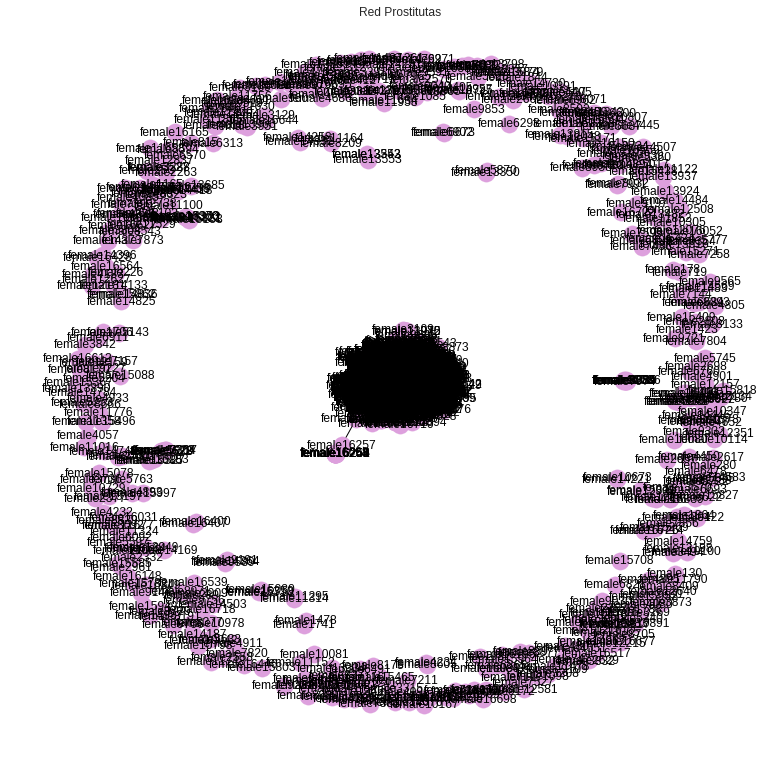

In [19]:
# Graficar la red de compradores inducida. 

plt.figure(figsize=(10,10))
nx.draw(femaleNetwork, with_labels=True, node_color='plum')
plt.title('Red Prostitutas')
plt.show()

### Proyección Compradores

In [0]:
#### Calculamos las proyecciones - compradores.

maleProjection =  adjacencyMatrix @ transposeAadjacencyMatrix

# Dado que la ejecucion es demorada guardamos y descargamos la matriz. 

pickle.dump(maleProjection, open('maleProjectionNOz.pickle.pickle','wb'))


In [0]:
# Codigo para descargar de google drive la proyeccion creada en la celda anterior. 

if not os.path.exists('maleProjectionNOz.pickle'):
  # Install the PyDrive wrapper & import libraries.
  # This only needs to be done once per notebook.
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  # Authenticate and create the PyDrive client.
  # This only needs to be done once per notebook.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Download a file based on its file ID(Grey).
  #
  # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
  # Link del archivo: 
  # https://drive.google.com/open?id=1j8iz9zIx71UmycVvYdn0uOO8HXHovnhS
  
  # Sacamos solo el id. 
  file_id = '1j8iz9zIx71UmycVvYdn0uOO8HXHovnhS'
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(downloaded['title'])

In [0]:
##### Cargamos la proyeccion calculada anteriormente. 

maleProjection = pickle.load(open('maleProjectionNOz.pickle','rb'))

# Igualamos la diagonal de la proyeccion a cero.
np.fill_diagonal(maleProjection,0)

In [15]:
# Convertimos la matriz a dataframe. 

# Muestra la proyeccion en un dataframe.

maleProjectionPD = pd.DataFrame(maleProjection,index= males, columns = males)

maleProjectionPD.head(15)

,male1,male4,male6,male8,male10,male12,male14,male16,male19,male20,...,male16706,male16707,male16708,male16709,male16715,male16717,male16719,male16723,male16727,male16729
male1,0,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
male4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male12,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male14,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
male16,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
male19,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
male20,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#### Creamos las red de compradores. 

maleNetwork = nx.from_pandas_adjacency(maleProjectionPD)

print(nx.info(maleNetwork))

Name: 
Type: Graph
Number of nodes: 10106
Number of edges: 668183
Average degree: 132.2349


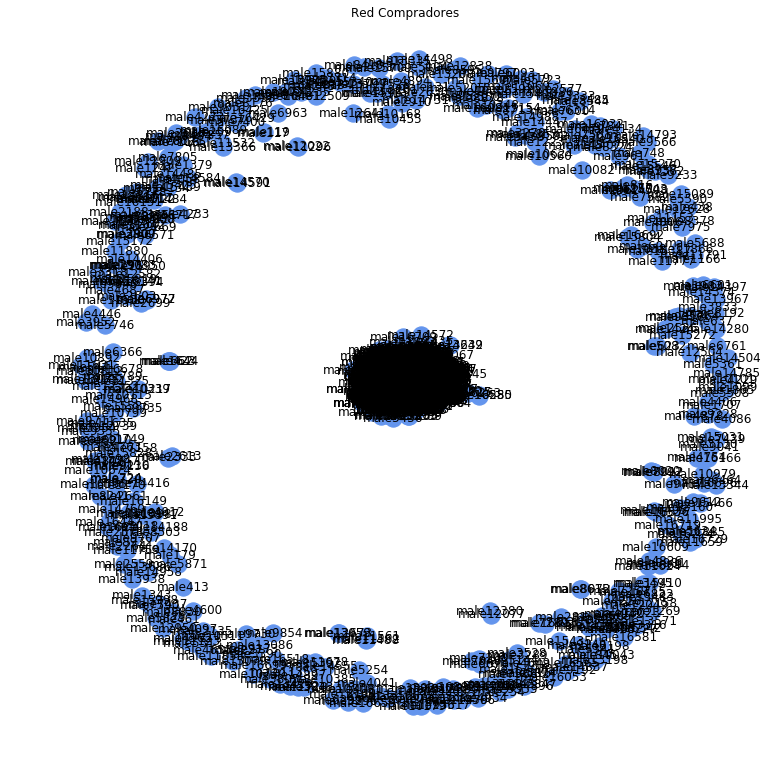

In [0]:
# Graficar la red de compradores inducida. 

plt.figure(figsize=(10,10))
nx.draw(maleNetwork, with_labels=True, node_color='cornflowerblue')
plt.title('Red Compradores')
plt.show()

>** a) ** Calcular y analizar el grado promedio con y sin pesos y explicar la diferencia entre ambas medidas.

In [0]:
#### Red Prostitutas.

# Calculamos el grado promedio sin pesos. 
print()

femaleDegree = dict(femaleNetwork.degree())
topTenFemales =  sorted(femaleDegree,key=femaleDegree.get,reverse=True)[:10]

# Imprime el numero de jugadores contratados.
for female in topTenFemales:
  print(female,' : ',femaleDegree[female])

female4585  :  993
female4569  :  984
female4200  :  913
female7714  :  887
female10964  :  874
female18  :  844
female98  :  812
female11717  :  803
female6813  :  782
female8344  :  777


Text(0,0.5,'Conteo')

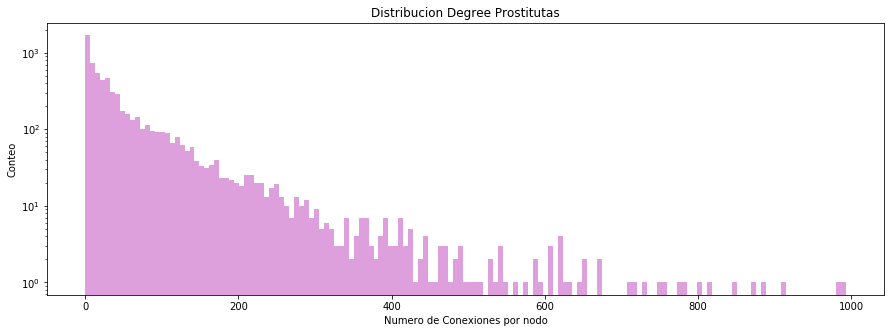

In [0]:
# Graficamos la distribucion sin pesos.

deg = []
for node in femaleNetwork.nodes():
  deg.append(femaleNetwork.degree(node))
  
# Plot degrees.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color = 'plum')
plt.title('Distribucion Degree Prostitutas')
plt.xlabel('Numero de Conexiones por nodo')
plt.ylabel('Conteo')

In [18]:
#### Red Prostitutas.

# Calculamos el grado promedio con pesos. 

femaleDegree = dict(femaleNetwork.degree(weight='weight'))
topTenFemales =  sorted(femaleDegree,key=femaleDegree.get,reverse=True)[:10]

# Imprime el numero de jugadores contratados.
for female in topTenFemales:
  print(female,' : ',femaleDegree[female])

female4569  :  3607
female4585  :  3267
female4200  :  3031
female7714  :  2492
female6813  :  2349
female98  :  2348
female11717  :  2314
female10964  :  2180
female18  :  2084
female7730  :  1981


Text(0,0.5,'Conteo')

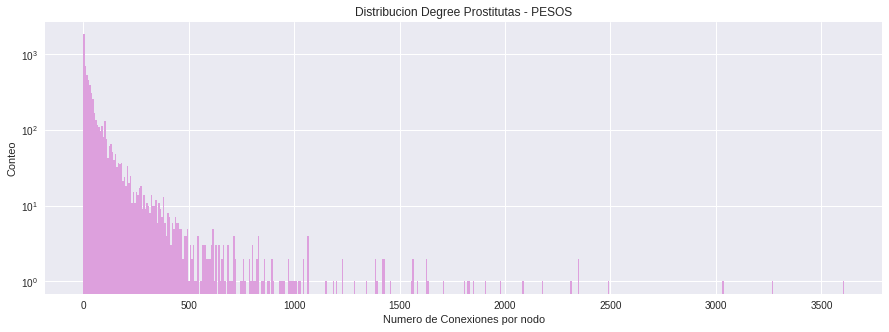

In [19]:
# Graficamos la distribucion con pesos.

deg = []
for node in femaleNetwork.nodes():
  deg.append(femaleDegree[node])
  
# Plot degrees.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color= 'plum')
plt.title('Distribucion Degree Prostitutas - PESOS')
plt.xlabel('Numero de Conexiones por nodo')
plt.ylabel('Conteo')

In [0]:
#### Red Compradores.

# Calculamos el grado promedio sin pesos. 

maleDegree = dict(maleNetwork.degree())
topTenMales =  sorted(maleDegree,key=maleDegree.get,reverse=True)[:10]

# Imprime el numero de jugadores contratados.
for male in topTenMales:
  print(male,' : ',maleDegree[male])

male370  :  2695
male1441  :  2108
male2368  :  2048
male4294  :  2020
male924  :  1993
male2387  :  1902
male4863  :  1892
male6022  :  1833
male13081  :  1822
male1653  :  1773


Text(0,0.5,'Conteo')

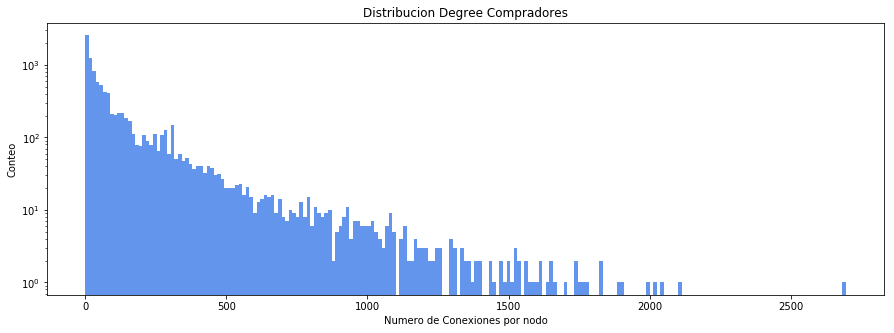

In [0]:
# Graficamos la distribucion sin pesos.

deg = []
for node in maleNetwork.nodes():
  deg.append(maleNetwork.degree(node))
  
# Plot degrees.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color = 'cornflowerblue')
plt.title('Distribucion Degree Compradores')
plt.xlabel('Numero de Conexiones por nodo')
plt.ylabel('Conteo')

In [20]:
#### Red Compradores.

# Calculamos el grado promedio con pesos. 

maleDegree = dict(maleNetwork.degree(weight='weight'))
topTenMales =  sorted(maleDegree,key=maleDegree.get,reverse=True)[:10]

# Imprime el numero de jugadores contratados.
for male in topTenMales:
  print(male,' : ',maleDegree[male])

male370  :  5828
male924  :  3920
male2368  :  3841
male1441  :  3623
male13081  :  3581
male6558  :  3455
male4294  :  3449
male4863  :  3405
male2387  :  3292
male5908  :  3290


Text(0,0.5,'Conteo')

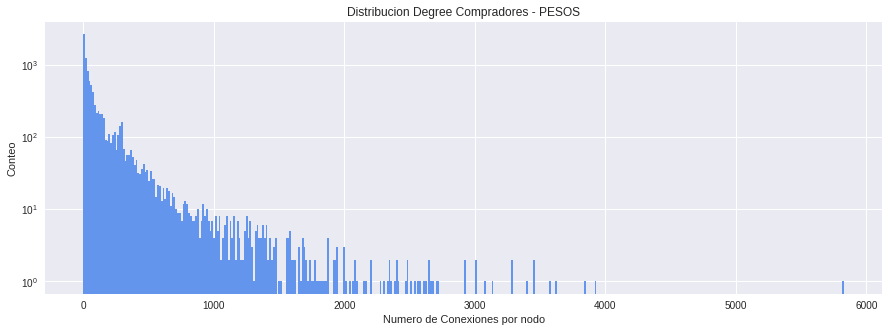

In [21]:
# Graficamos la distribucion con pesos.

deg = []
for node in maleNetwork.nodes():
  deg.append(maleDegree[node])
  
# Plot degrees.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color = 'cornflowerblue')
plt.title('Distribucion Degree Compradores - PESOS')
plt.xlabel('Numero de Conexiones por nodo')
plt.ylabel('Conteo')

>** b) ** Calcular y analizar las medidas de centralidad sin pesos: coeficiente de clustering promedio, betweenness, diámetro y densidad.

In [0]:
##### Red de Prostitutas

Text(0,0.5,'Conteo')

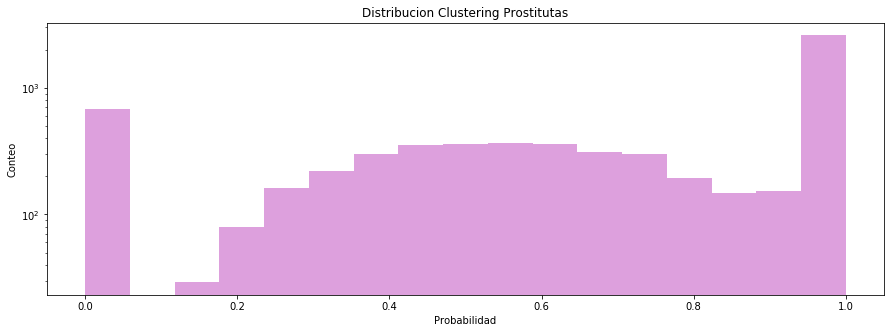

In [0]:
# Calculamos el coeficiente de clustering promedio. 

femaleClustering = nx.clustering(femaleNetwork)

# Graficamos la distribucion sin pesos.

deg = []
for node in femaleNetwork.nodes():
  deg.append(femaleClustering[node])
  
# Plot Clustering.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color= 'plum')
plt.title('Distribucion Clustering Prostitutas')
plt.xlabel('Probabilidad')
plt.ylabel('Conteo')

Text(0,0.5,'Conteo')

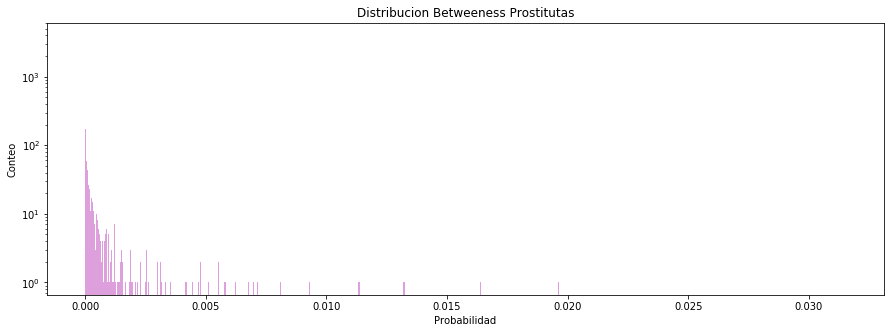

In [0]:
# Calculamos el betweenness. 

femaleBetweeness = nx.betweenness_centrality(femaleNetwork,normalized=True)

# Graficamos la distribucion sin pesos.

deg = []
for node in femaleNetwork.nodes():
  deg.append(femaleBetweeness[node])
  
# Plot Clustering.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color= 'plum')
plt.title('Distribucion Betweeness Prostitutas')
plt.xlabel('Probabilidad')
plt.ylabel('Conteo')

In [28]:
# Calculamos el diametro de la red. 

# Verificamos si la red esta totalmente conectada.
if nx.is_connected(femaleNetwork):
    nx.diameter(femaleNetwork)
else:
    largestpath = []
    allGraphs=list(nx.connected_component_subgraphs(femaleNetwork))
    for i in allGraphs:
        largestpathT=nx.diameter(i)
        largestpath.append(largestpathT)
        print('El diametro maximo de los componentes conectados del subgrafo es: ', largestpathT)

El diametro maximo de los componentes conectados del subgrafo es:  8
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  1
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componen

In [27]:
# El diametro del subgrafo conexo mas grande es: 

print('El diametro del subgrafo conexo mas grande es: \n', max(largestpath))

El diametro del subgrafo conexo mas grande es: 
 8


In [0]:
##### Red de Compradores

Text(0,0.5,'Conteo')

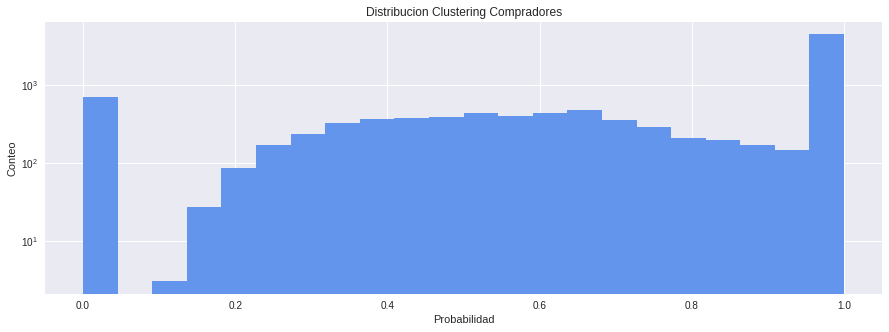

In [18]:
# Calculamos el coeficiente de clustering promedio. 

maleClustering = nx.clustering(maleNetwork)

# Graficamos la distribucion sin pesos.

deg = []
for node in maleNetwork.nodes():
  deg.append(maleClustering[node])
  
# Plot Clustering.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color= 'cornflowerblue')
plt.title('Distribucion Clustering Compradores')
plt.xlabel('Probabilidad')
plt.ylabel('Conteo')

Text(0,0.5,'Conteo')

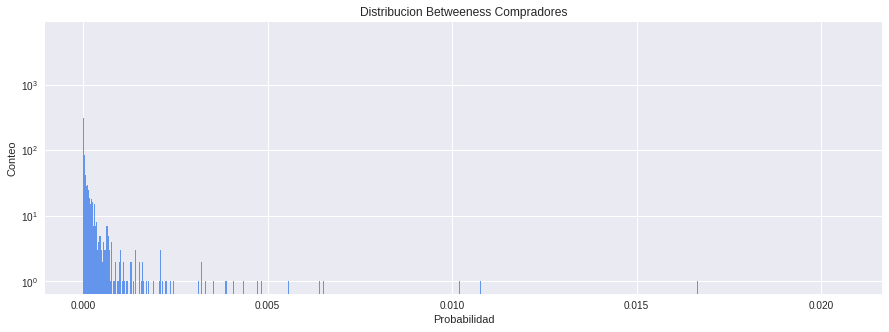

In [19]:
# Calculamos el coeficiente de clustering promedio. 

maleBetweeness = nx.betweenness_centrality(maleNetwork,normalized=True)

# Graficamos la distribucion sin pesos.

deg = []
for node in maleNetwork.nodes():
  deg.append(maleBetweeness[node])
  
# Plot Clustering.

plt.figure(figsize=(15,5))
plt.hist(deg,bins='auto',log=True, color= 'cornflowerblue')
plt.title('Distribucion Betweeness Compradores')
plt.xlabel('Probabilidad')
plt.ylabel('Conteo')

In [20]:
# Calculamos el diametro de la red. 

# Verificamos si la red esta totalmente conectada.
if nx.is_connected(maleNetwork):
    nx.diameter(maleNetwork)
else:
    largestpath = []
    allGraphs=list(nx.connected_component_subgraphs(maleNetwork))
    for i in allGraphs:
        largestpathT=nx.diameter(i)
        largestpath.append(largestpathT)
        print('El diametro maximo de los componentes conectados del subgrafo es: ', largestpathT)

El diametro maximo de los componentes conectados del subgrafo es:  8
El diametro maximo de los componentes conectados del subgrafo es:  1
El diametro maximo de los componentes conectados del subgrafo es:  1
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  1
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  1
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componentes conectados del subgrafo es:  0
El diametro maximo de los componen

In [0]:
# El diametro del subgrafo conexo mas grande es: 

print('El diametro del subgrafo conexo mas grande es: \n', max(largestpath))

El diametro del subgrafo conexo mas grande es: 
 8


>** c) ** Estimar la distribución del grado (sin pesos) de cada red (a partir de un fit polinomial o una prueba chi cuadrado o kolmogorov-smirnov)

Text(0,0.5,'Conteo')

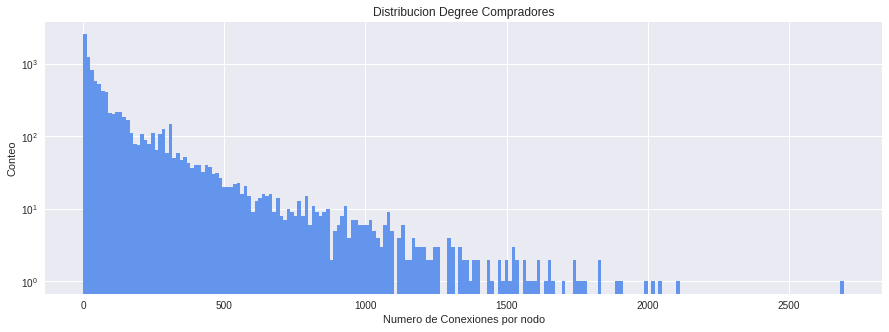

In [24]:
# Retomamos la distribucion del degree.

degFit = []
for node in maleNetwork.nodes():
    degFit.append(maleNetwork.degree(node))
  
# Graficamos el grado.

plt.figure(figsize=(15,5))
plt.hist(degFit,bins='auto',log=True, color = 'cornflowerblue')
plt.title('Distribucion Degree Compradores')
plt.xlabel('Numero de Conexiones por nodo')
plt.ylabel('Conteo')

In [42]:
#### Realizamos un fit al histograma para varias distribuciones. 

import scipy.stats as st

# Definimos las distribuciones a probar.
distributions = [st.laplace, st.norm, st.expon, st.dweibull, st.lognorm,st.gamma,st.powerlaw,st.t]
#distributions = [st.laplace, st.norm, st.expon, st.dweibull, st.invweibull, st.lognorm, st.uniform]
mles = []

data = degFit

# Encontramos el mle para cada distribucion.
print('Estamos probando las siguientes distribuciones...')
for distribution in distributions:
    print('  ---> ',distribution.name)
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)

results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]

# Organizamos por el MLE

best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]

# Imprimimos el mejor FIT
print('La Distribucion que mejor se ajusta es --> {} -- MLE value: {}'.format(best_fit[0].name, best_fit[1])          )


#print([mod[0].name for mod in sorted(zip(distributions, mles), key=lambda d: d[1])])

Estamos probando las siguientes distribuciones...
  --->  laplace
  --->  norm
  --->  expon
  --->  dweibull
  --->  lognorm
  --->  gamma
  --->  powerlaw
  --->  t
La Distribucion que mejor se ajusta es --> powerlaw -- MLE value: 50933.76155413734


Text(0,0.5,'Conteo')

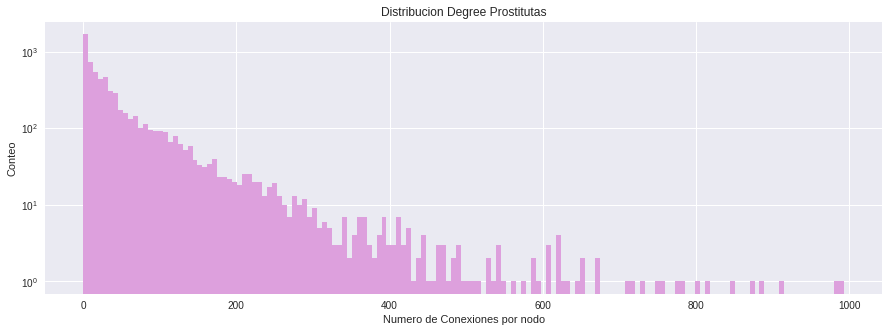

In [43]:
# Retomamos la distribucion del degree(Prostitutas).

degFit = []
for node in femaleNetwork.nodes():
    degFit.append(femaleNetwork.degree(node))
  
# Graficamos el grado.

plt.figure(figsize=(15,5))
plt.hist(degFit,bins='auto',log=True, color = 'plum')
plt.title('Distribucion Degree Prostitutas')
plt.xlabel('Numero de Conexiones por nodo')
plt.ylabel('Conteo')

In [44]:
#### Realizamos un fit al histograma para varias distribuciones. 

import scipy.stats as st

# Definimos las distribuciones a probar.
distributions = [st.laplace, st.norm, st.expon, st.dweibull, st.lognorm,st.gamma,st.powerlaw,st.t]
#distributions = [st.laplace, st.norm, st.expon, st.dweibull, st.invweibull, st.lognorm, st.uniform]
mles = []

data = degFit

# Encontramos el mle para cada distribucion.
print('Estamos probando las siguientes distribuciones...')
for distribution in distributions:
    print('  ---> ',distribution.name)
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)

results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]

# Organizamos por el MLE

best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]

# Imprimimos el mejor FIT
print('La Distribucion que mejor se ajusta es --> {} -- MLE value: {}'.format(best_fit[0].name, best_fit[1])          )


#print([mod[0].name for mod in sorted(zip(distributions, mles), key=lambda d: d[1])])

Estamos probando las siguientes distribuciones...
  --->  laplace
  --->  norm
  --->  expon
  --->  dweibull
  --->  lognorm
  --->  gamma
  --->  powerlaw
  --->  t
La Distribucion que mejor se ajusta es --> powerlaw -- MLE value: 18720.997310755847


>** d) ** Asociar cada red con alguno de los modelos de redes aleatorias vistos en clase: Ërdos-Rényi, Wats-Strogatz y Barabasi-Albert. Para esto usted debe soportar su decisión con los resultados de los literales a, b y c.

In [0]:
### Erdos -> Poisson 
# Wats -> Dirac
# Barabasi -> k^(-3) 

**3.** ¿Podría inferir la existencia de una red de prostitución consolidada con la información suministrada?

In [49]:
#### Para verificar si hay una red de prostitucion se analizan los tamaños de los subgrafos conexos.

# Encontramos el componente conexo mas grande de la red.
largestComponent = max(nx.connected_components(femaleNetwork),key=len)

print('El componente conexo mas grande de la red de prostitutas tiene el ',100*(len(largestComponent)/nx.number_of_nodes(femaleNetwork)),'% de los nodos.')

El componente conexo mas grande tiene el  92.96497584541062 % de los nodos.


# Bono

In [0]:
# Encuentra el subgrafo del componente conexo mas grande.
maxNodes= -1
biggestNet = 0
for net in nx.connected_component_subgraphs(femaleNetwork):
  # Busca el subgrafo con el mayor numero de nodos.
  if maxNodes == -1:
    maxNodes = nx.number_of_nodes(net)
    biggestNet = net
  else:
    tempNum = nx.number_of_nodes(net)
    if tempNum > maxNodes:
      maxNodes = tempNum
      biggestNet = net
  

El numero de nodos del componente conexo mas grande es: 6158


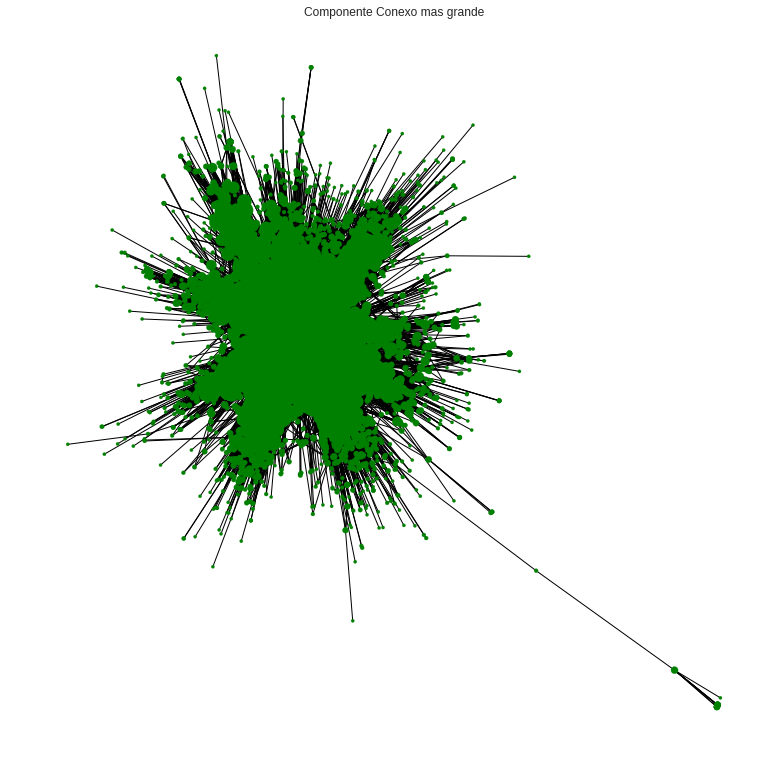

In [26]:
print('El numero de nodos del componente conexo mas grande es:', nx.number_of_nodes(biggestNet))

# Graficar la red de compradores inducida. 

deg = nx.degree(biggestNet)
plt.figure(figsize=(10,10))
nx.draw(biggestNet, with_labels=False, node_color='green', node_size=[(deg[node]+1) * 5 for node in biggestNet.nodes()])
plt.title('Componente Conexo mas grande')
plt.show()
